## Pré-Processamento e Sampling
# Codificação, Discretização e Oversampling
Jéssica Kushida (23012069) <br></br>
Natália Naomi Sumida (23008255) 
<br></br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_error
from sklearn.experimental import enable_iterative_imputer


In [3]:
data = pd.read_csv("heart.csv")

1) 
- Apresente a estrutura geral da base (.info(), .shape, .head()), tipos de dados e existência de valores ausentes;

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
# (linhas, colunas)
data.shape

(918, 12)

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- Gere descrições estatísticas (.describe()) para as variáveis numéricas;



In [7]:
data.describe(include=np.number)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
data.median(numeric_only=True)

Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

Observa-se que não há valores nulos, uma vez que numero de entradas (218) é igual a quantidade de valores não nulos:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Plote histogramas ou boxplots para identificar a distribuição e possíveis outliers em variáveis contínuas;



In [8]:
num_cols = list(data.select_dtypes(include=np.number).columns)

def plot_chunk(cols):
    """
    Plota até 3 histogramas para a lista de colunas `cols`
    """
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    # se for só 1 coluna, garantir iterável
    if n == 1:
        axes = [axes]
    for ax, col in zip(axes, cols):
        sns.histplot(data[col], kde=True, bins=20, ax=ax)
        colName = col.capitalize().replace('_', ' ')
        ax.set_title(f"Histogram Attribute – {colName}")
        ax.set_xlabel(f"{colName} level")
        ax.set_ylabel("Frequency")
        ax.grid(True)
    fig.subplots_adjust(wspace=0.4)
    plt.show()

## Bloco 1
- Age: Pode-se observar distribuição homogênea, com média e mediana próximas e visualmente sem outliers significantes
- Restingbp: Leve assimetria à esquerda, com tendência de valores mais próximos à 130 (mediana) e dispersão modesta, com poucos valores outliers mínimos (próximos a 0).
Esse valor 0, no entanto, não faz sentido para o contexto de Pressão arterial em repouso e muito provavelmente são valores substituintes para valores faltantes.
- Cholesterol: sobre valores 0, a mesma coisa para essa métrica, provavelmente são substituintes para valores faltantes. Assimetria leve a direita, com valores concentrados
próximos a ~220. Dado o contexto do colesterol normal ser < 200, observa-se que o 75 percentil se encontra acima com representação considerável da amostra.

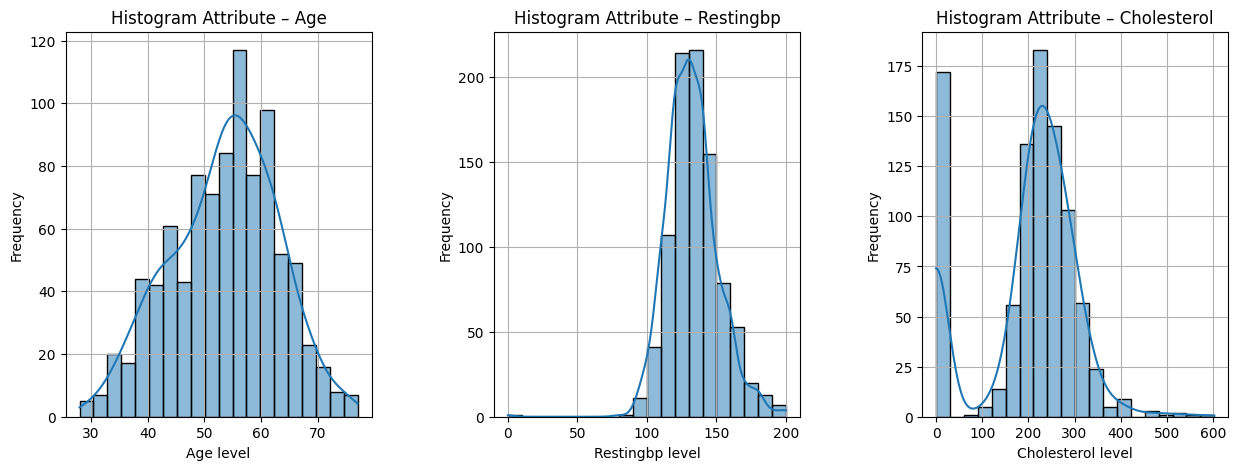

In [ ]:
plot_chunk(num_cols[0:3])

## Bloco 2
- Fastingbs: variável estritamente binária (valores de entrada 0 ou 1). A mediana em 0 e a média em ≈ 0,23 indicam que cerca de 77 % dos pacientes não apresentam glicemia de jejum elevada, enquanto os 23 % restantes estão no nível de risco (valor 1). Não há outliers além desses dois pontos, pois toda a dispersão está condicionada a essa dicotomia.
- MaxHR: verifica-se distribuição quase simétrica em torno de valores altos. A mediana (138 bpm) e a média (≈ 136,8 bpm) estão muito próximas, com desvio-padrão moderado de ≈ 25,5 bpm (CV ≈ 18 %).O mínimo registrado (60 bpm) pode refletir limitação funcional e o máximo (202 bpm) está dentro do esperado para esforço máximo em adultos.
- Oldpeak:mede a depressão do segmento ST pós-exercício. Há forte assimetria à direita: a mediana em 0,6 e a média ≈ 0,89 mostram leve depressão na maioria, mas 25 % dos casos não registram depressão alguma (oldpeak = 0) e a cauda chega a 6,2, sinalizando depressão acentuada em um pequeno grupo. O valor mínimo de –2,6 (elevação de ST) é incomum, porém plausível, e merece checagem no dicionário de dados.

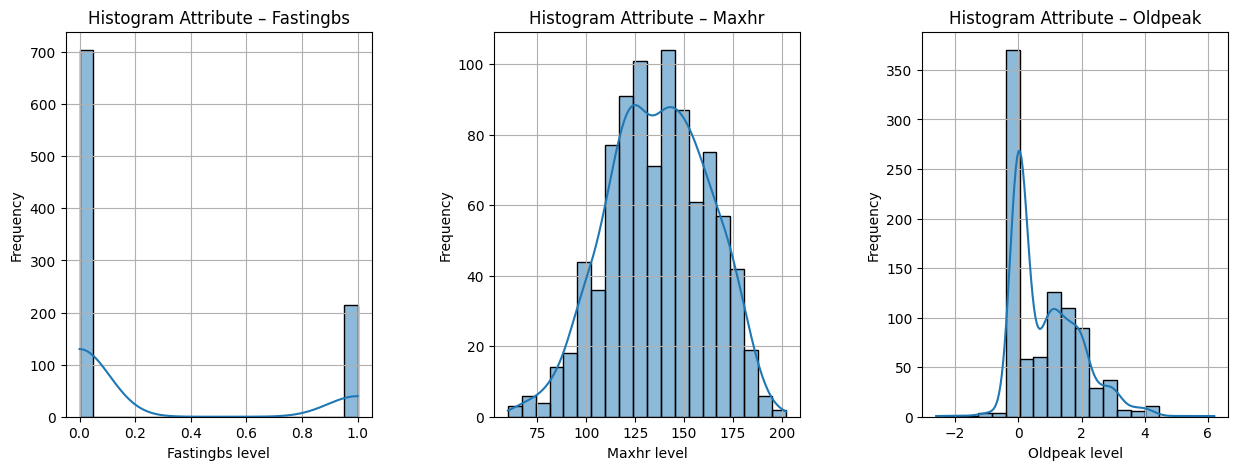

In [19]:
plot_chunk(num_cols[3:6])

## Bloco 4
- HeartDesease:  variável binária (0 = sem doença, 1 = com doença). A média de ≈ 0,46 e a mediana em 0 mostram que cerca de 54 % dos pacientes não têm diagnóstico, enquanto os 46 % restantes apresentam doença cardíaca. Não há “outliers” além desses dois valores, mas essa proporção relativamente alta indica que quase metade da amostra já foi diagnosticada, reforçando a importância de cruzar esse dado com fatores de risco como colesterol elevado e depressão de ST pós-exercício.

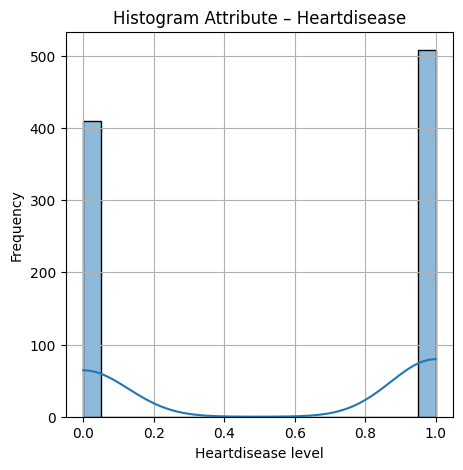

In [22]:
plot_chunk(num_cols[6:9])

 **2) Identifique pelo menos uma variável categórica da base de dados. Em seguida, aplique duas abordagens distintas de codificação: a primeira utilizando One-Hot Encoding e a segunda com Label Encoding. Apresente o resultado de ambas as transformações e compare o número de colunas geradas, bem como os valores atribuídos em cada codificação. Por fim, responda: qual tipo de codificação seria mais adequado para algoritmos baseados em distância, e por quê?**

Variavel categórica escolhida: RestingECG

In [23]:
from sklearn.preprocessing import LabelEncoder

rc = data[['RestingECG']].copy()

le = LabelEncoder()
rc['RestingECG_LE'] = le.fit_transform(rc['RestingECG'])

print("Mapeamento LabelEncoder:", dict(zip(le.classes_, le.transform(le.classes_))))
print(rc.head())

Mapeamento LabelEncoder: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}
  RestingECG  RestingECG_LE
0     Normal              1
1     Normal              1
2         ST              2
3     Normal              1
4     Normal              1


In [24]:
rc_ohe = pd.get_dummies(data[['RestingECG']], prefix='ECG')
print(rc_ohe.head())

   ECG_LVH  ECG_Normal  ECG_ST
0    False        True   False
1    False        True   False
2    False       False    True
3    False        True   False
4    False        True   False


Escolhi a coluna RestingECG, que registra o tipo de eletrocardiograma em repouso com três categorias possíveis: Normal, ST e LVH. Primeiro, apliquei o Label Encoding, que simplesmente atribui a cada categoria um número inteiro sem nenhuma relação de ordem real entre eles. No meu caso, o scikit-learn mapeou LVH → 0, Normal → 1 e ST → 2, gerando uma única coluna nova chamada, por exemplo, ECG_label.
<br></br>
Em seguida, usei o One-Hot Encoding, que cria uma coluna binária para cada categoria, indicando com 1 onde a observação pertence àquela categoria e com 0 nos demais casos. Usando o pd.get_dummies, obtive três colunas: ECG_LVH, ECG_Normal e ECG_ST.
<br></br>
Resumindo, o Label Encoding gera 1 coluna com valores inteiros (0, 1, 2), enquanto o One-Hot gera 3 colunas binárias (uma para cada categoria). Para algoritmos baseados em distância (como k-NN ou k-means), o One-Hot Encoding costuma ser mais adequado: ele trata cada categoria como um eixo independente, garantindo que a distância entre quaisquer duas categorias seja sempre a mesma e não seja influenciada por um suposto “ranking” que o Label Encoding impõe (por exemplo, fazer com que ST (2) pareça duas vezes mais distante de LVH (0) do que Normal (1)).

<br></br>  

**3) Escolha ao menos uma variável contínua da base de dados (sugestão: Age) e aplique duas técnicas diferentes de discretização: uma baseada em intervalos uniformes e outra baseada em quantis. Para cada discretização, crie histogramas comparando a distribuição original com as versões discretizadas. Analise os resultados e responda: qual das técnicas resultou em grupos com quantidades mais equilibradas de observações? Qual delas pode ser mais útil dependendo do tipo de análise a ser realizada?**

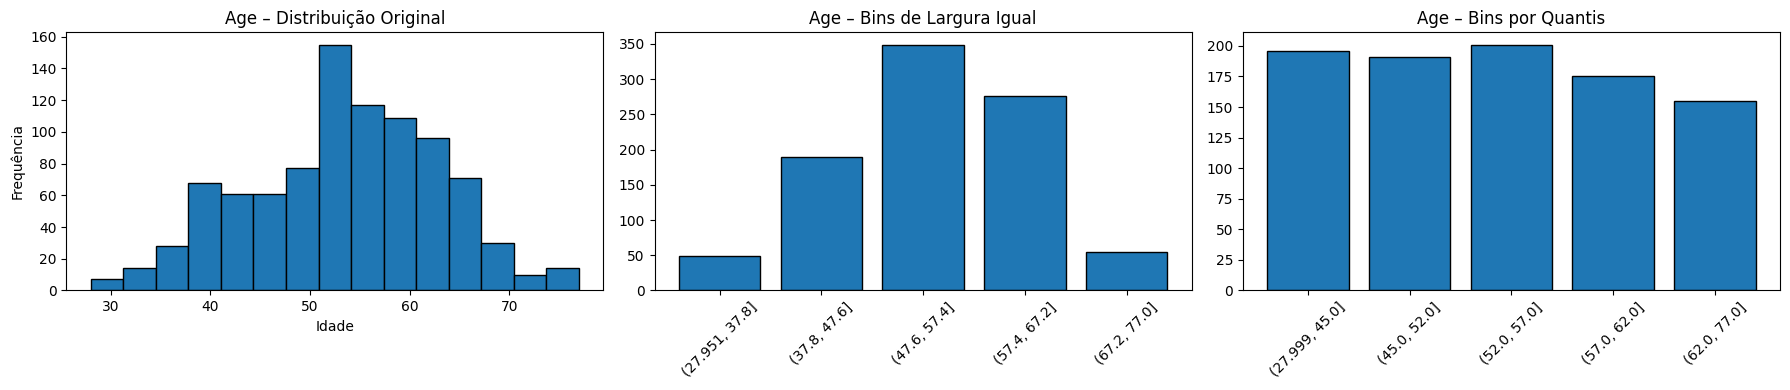

In [27]:
age = data['Age']

age_equal = pd.cut(age, bins=5)

age_quantile = pd.qcut(age, 5)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# histograma original
axes[0].hist(age, bins=15, edgecolor='black')
axes[0].set_title('Age – Distribuição Original')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# histograma com intervalos uniformes
counts_eq = age_equal.value_counts().sort_index()
axes[1].bar([str(iv) for iv in counts_eq.index], counts_eq.values, edgecolor='black')
axes[1].set_title('Age – Bins de Largura Igual')
axes[1].tick_params(axis='x', rotation=45)

# histograma com intervalos por quantis
counts_qt = age_quantile.value_counts().sort_index()
axes[2].bar([str(iv) for iv in counts_qt.index], counts_qt.values, edgecolor='black')
axes[2].set_title('Age – Bins por Quantis')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

A técnica de quantis gera grupos mais equilibrados em termos de número de observações, o que é útil quando queremos comparar subamostras de tamanho similar (por exemplo, testar modelo ou analisar comportamentos por faixa com equal-freq). Já a discretização uniforme ajuda a ver claramente como os valores se distribuem ao longo do eixo de idades, destacando faixas esparsas ou concentradas — ideal para explorar vacâncias ou picos na escala original.

<br></br>

**4) Verifique a distribuição da variável-alvo HeartDisease. Caso identifique desbalanceamento entre as classes (ou seja, uma classe com número significativamente maior de registros que a outra), aplique as seguintes técnicas de balanceamento: Random Oversampling, Random Undersampling e também SMOTE (Synthetic Minority Over-sampling Technique), utilizando a biblioteca imblearn. Para cada técnica, apresente gráficos comparativos que mostrem a nova distribuição das classes após o balanceamento. Em seguida, discuta criticamente: qual das abordagens mais preserva a diversidade dos dados originais? Quais riscos estão associados ao uso de undersampling ou à geração de exemplos sintéticos com SMOTE? Em que cenários cada técnica pode ser mais indicada?**

In [31]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [ ]:
# Separando em X (atributos) e Y (target - var alvo)
#    - X: todas as colunas exceto a última (HeartDisease)
#    - Y: só a coluna HeartDisease
X = data.iloc[:, :-1]
Y = data['HeartDisease']
# Confirmação do split
print(X.shape, Y.shape)

(918, 11) (918,)


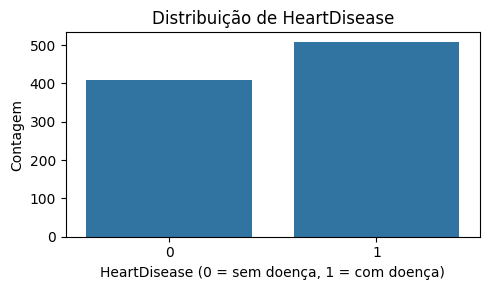

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [50]:
plt.figure(figsize=(5, 3))
sns.countplot(x=Y)
plt.title('Distribuição de HeartDisease')
plt.xlabel('HeartDisease (0 = sem doença, 1 = com doença)')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()
Y.value_counts() # valores absolutos de cada classe


In [ ]:
X = pd.get_dummies(data.drop('HeartDisease', axis=1), drop_first=False)
Y = data['HeartDisease']

In [ ]:
from sklearn.utils import resample

## Random Oversampling
Aumentar a classe minoritária (0 - sem doença) até que tenha mesmo tamanho da classe majoritária.
Duplica linhas aleatóriamente.
<br>classe min -> n_maj </br>

In [58]:
counts = Y.value_counts()
#Random Oversampling 
X_min = X[Y == counts.idxmin()]
y_min = Y[Y == counts.idxmin()]

X_ros, y_ros = resample(
    X_min, y_min,
    replace=True,
    n_samples=counts.max(),
    random_state=42
)

## Random UnderSampling
Diminuir a classe majoritária (1 - com doença) até que tenha mesmo tamanho da classe minoritária.
Remove linhas aleatóriamente.
<br>classe maj -> n_min </br>

In [59]:
X_maj = X[Y == counts.idxmax()]
y_maj = Y[Y == counts.idxmax()]
X_rus, y_rus = resample(
    X_maj, y_maj,
    replace=False,
    n_samples=counts.min(),
    random_state=42
)

In [61]:
from imblearn.over_sampling import SMOTE

## SMOTE
“interpolar” novos pontos entre uma amostra minoritária e os seus vizinhos mais próximos, criando variação e evitando que o modelo dê overfitting em cópias exatas.

### Como o SMOTE funciona

1. Para cada exemplo da classe minoritária, escolhe-se aleatoriamente um dos seus k vizinhos mais próximos (geralmente k = 5).

2. Calcula-se a diferença entre o vetor da amostra original e o vetor do vizinho.

3. Multiplica-se essa diferença por um número aleatório entre 0 e 1 e soma-se ao vetor original.

4. O resultado é um novo ponto “entre” a amostra e o vizinho — nem sempre igual a nenhum dos dois, mas preservando características reais da distribuição.

In [62]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, Y)

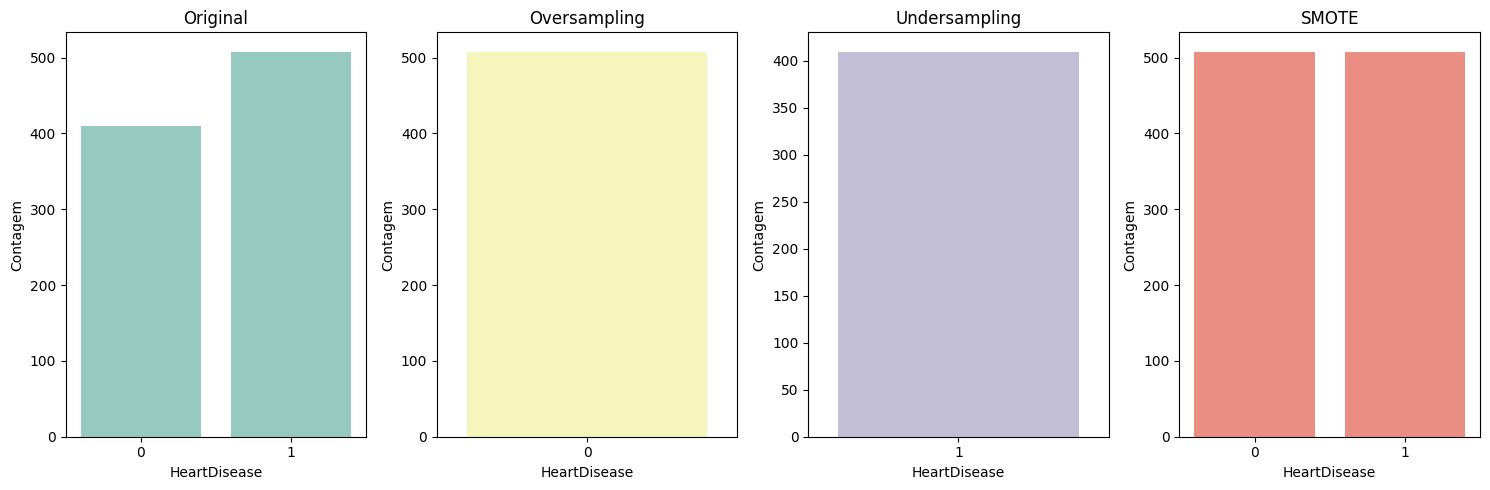

In [75]:
colors = sns.color_palette('Set3', 4)

fig, axes = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)
sns.countplot(x=Y, ax=axes[0],color=colors[0]).set_title('Original')
sns.countplot(x=y_ros,ax=axes[1], color=colors[1]).set_title('Oversampling')
sns.countplot(x=y_rus,ax=axes[2], color=colors[2]).set_title('Undersampling')
sns.countplot(x=y_sm, ax=axes[3], color=colors[3]).set_title('SMOTE')
for ax in axes:
    ax.set_xlabel('HeartDisease')
    ax.set_ylabel('Contagem')
plt.show()

<br>**Resposta:** </br>
<br> Undersampling descarta exemplos da classe majoritária até igualar o tamanho da minoritária, podendo descartar informação útil e causar underfitting. Por outro lado, quando você tem um volume de dados muitíssimo grande e o treinamento se torna lento demais, o undersampling pode ser uma boa saída para ganhar velocidade, desde que você faça várias amostragens aleatórias para testar a robustez do modelo.
</br>
<br> SMOTE, por sua vez, tenta manter toda a classe majoritária e enriquecer a minoritária com pontos sintéticos gerados por interpolação. Isso evita a duplicação exata (e o overfitting associado) e não elimina dados originais, mas também traz riscos:
- Se você interpolar entre vizinhos muito distantes ou em regiões onde há poucos exemplos minoritários, pode criar ruído e pontos fora da distribuição real, confundindo o classificador.
- Na fronteira entre classes, SMOTE pode gerar amostras em áreas de sobreposição, dificultando a separação.
</br>

*Casos de uso*:
- Undersampling: quando volume de dados da maioria for muito alto (milhares, milhões), e custo computacional de treinamento for crítico. Desbalanceamento extremo para evitar geração de ruído (que aconteceria com SMOTE).
- SMOTE: quando a base for pequena a média, querendo preservar toda a informação original e evitar overfitting de oversampling (puro) com ajuste adequado dos k vizinhos. Quando o desbalanceamento for moderado (por ex, 10-30% de casos minoritarios) para que exista espaço suficiente para uma interpolação mais realista.
- Em todos os casos, avaliar se análise é sensível a dados sintéticos, caso introdução de amostrar que não aconteceriam na prática seja inconcebível. Nesses casos, um leve desbalanceamento é aceitável.